## Detecting communities

In this notebook, we will go through an example of
1. Community detection
2. Motif analysis


### Community detection using Louvain method

In [68]:
import community
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import Counter

plt.rcParams["figure.figsize"] = (16, 10)

In [69]:
# Load film metadata dataset
df = pd.read_csv("data/network_metadata.tab", sep="\t", index_col="GexfID")

# Load a film (Good Will Hunting as an example)
film = nx.read_gexf("data/gexf/361.gexf", relabel=True)

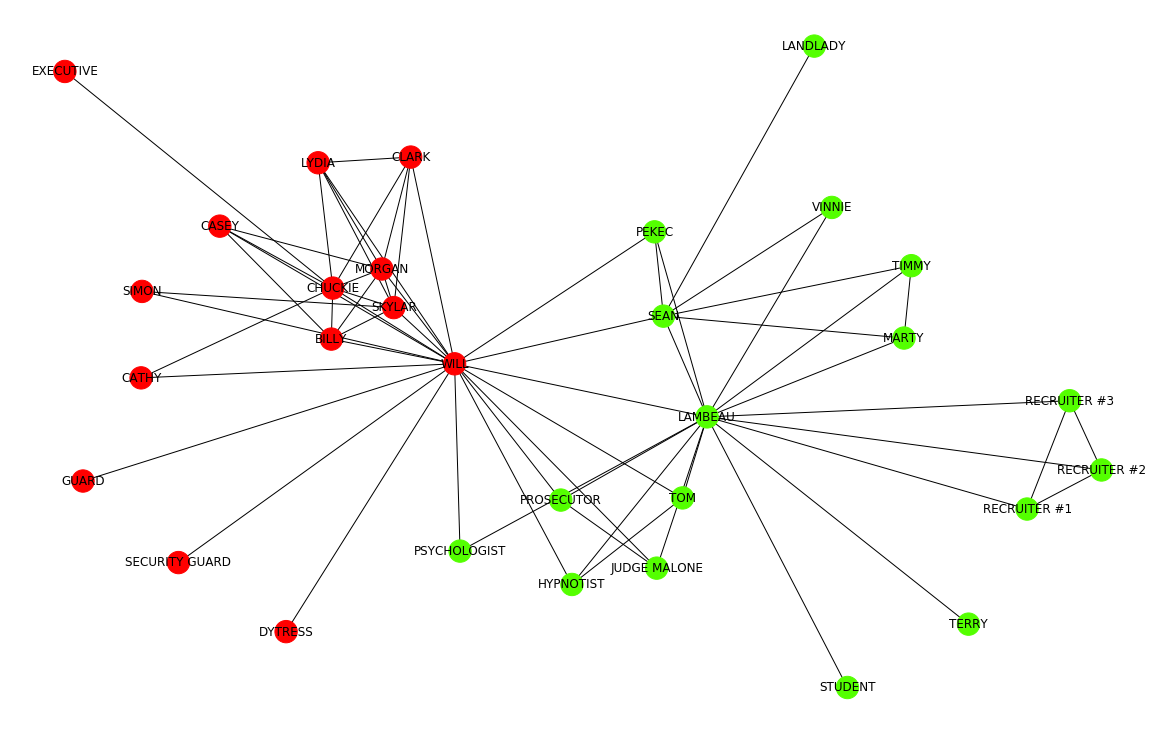

In [70]:
# Find and visualize communities using the Louvain method
part = community.best_partition(film)
values = [part.get(node) for node in film.nodes()]

communities = {}

for i, val in enumerate(values):
    communities.setdefault(val, []).append(list(film.nodes)[i])
        
nx.draw_spring(film, cmap = plt.get_cmap('prism'), node_color = values, node_size=500, with_labels=True)

These communities reflect the main character's social cliques quite accurately: Will's friends (red), and the people in the academia (green).

In [71]:
# Extract two community subgraphs
sub_gr1 = film.subgraph(communities[0])
sub_gr2 = film.subgraph(communities[1])

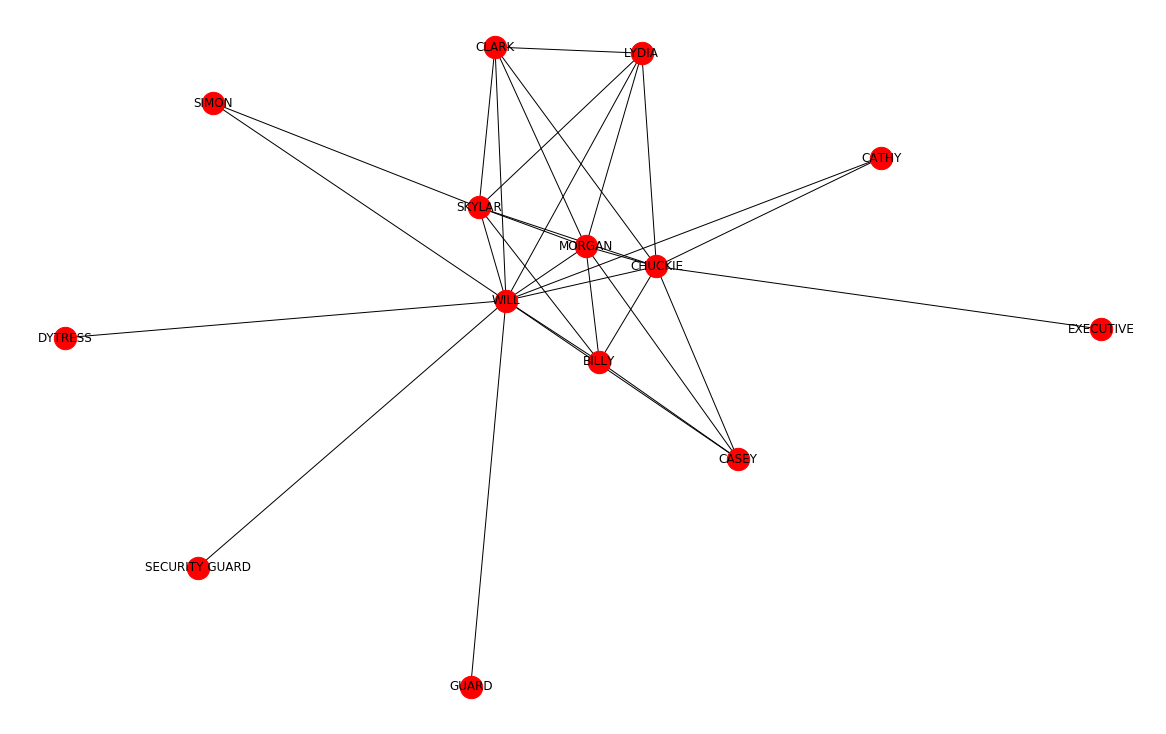

In [72]:
nx.draw_spring(sub_gr1, node_color = "red", node_size=500, with_labels=True)

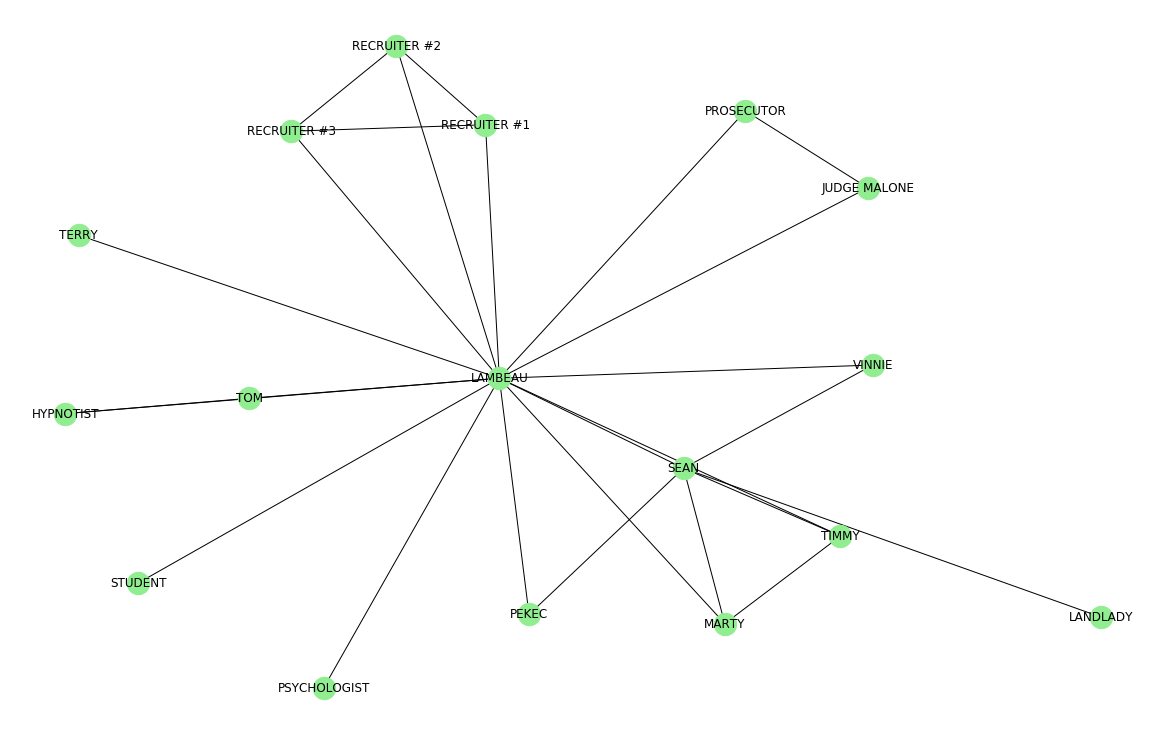

In [73]:
nx.draw_spring(sub_gr2, node_color = "lightgreen", node_size=500, with_labels=True)

### Motif count

In [74]:
# Define motifs
motifs_3 = {
    'Motif 1': nx.Graph([(1,2),(1,3)]),
    'Motif 2': nx.Graph([(1,2),(1,3),(2,3)]),
    }

motifs_4 = {
    'Motif 1': nx.Graph([(1,2),(1,3),(1,4)]),
    'Motif 2': nx.Graph([(1,2),(2,3),(3,4)]),
    'Motif 3': nx.Graph([(1,2),(1,3),(1,4),(3,4)]),
    'Motif 4': nx.Graph([(1,2),(2,3),(3,4),(4,1)]),
    'Motif 5': nx.Graph([(1,2),(2,3),(3,4),(4,1),(1,3),(2,4)])
    }

def mcounter_3(gr):
    mcount = dict(zip(motifs_3.keys(), list(map(int, np.zeros(len(motifs_3))))))
    nodes = gr.nodes()
    
    u_triplets = []
    for comb in itertools.combinations(nodes, 3):
        u_triplets.append(comb)
    
    for trip in u_triplets:
        sub_gr = gr.subgraph(trip)
        if (nx.is_connected(sub_gr)):
            mot_match = list(map(lambda mot_id: nx.is_isomorphic(sub_gr, motifs_3[mot_id]), motifs_3.keys()))
            match_keys = [list(motifs_3.keys())[i] for i in range(len(motifs_3)) if mot_match[i]]
            if len(match_keys) > 0:
                mcount[match_keys[0]] += 1

    return mcount

def mcounter_4(gr):
    mcount = dict(zip(motifs_4.keys(), list(map(int, np.zeros(len(motifs_4))))))
    nodes = gr.nodes()

    u_quadruplets = []
    for comb in itertools.combinations(nodes, 4):
        u_quadruplets.append(comb)
        
    for quad in u_quadruplets:
        sub_gr = gr.subgraph(quad)
        if (nx.is_connected(sub_gr)):
            mot_match = list(map(lambda mot_id: nx.is_isomorphic(sub_gr, motifs_4[mot_id]), motifs_4.keys()))
            match_keys = [list(motifs_4.keys())[i] for i in range(len(motifs_4)) if mot_match[i]]
            if len(match_keys) > 0:
                mcount[match_keys[0]] += 1
    
    return mcount

#### Three-node motifs

In [75]:
mcounter_3(film)

{'Motif 1': 311, 'Motif 2': 56}

In [76]:
mcounter_3(sub_gr1)

{'Motif 1': 80, 'Motif 2': 34}

In [77]:
mcounter_3(sub_gr2)

{'Motif 1': 105, 'Motif 2': 12}

#### Four-node motifs

In [78]:
mcounter_4(film)

{'Motif 1': 1104, 'Motif 2': 193, 'Motif 3': 595, 'Motif 4': 0, 'Motif 5': 28}

In [79]:
mcounter_4(sub_gr1)

{'Motif 1': 114, 'Motif 2': 11, 'Motif 3': 132, 'Motif 4': 0, 'Motif 5': 23}

In [80]:
mcounter_4(sub_gr2)

{'Motif 1': 341, 'Motif 2': 10, 'Motif 3': 121, 'Motif 4': 0, 'Motif 5': 2}

Notice how Motif 1 dominates in the green community, due to Lambeau being a central character. In the red community, notice how much more common Motif 5 is compared to the green community (a circle of friends, most of whom know each other).